In [64]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

In [65]:
df = pd.read_csv('Wine-quality-challenge.csv')

In [66]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Normal Distribution

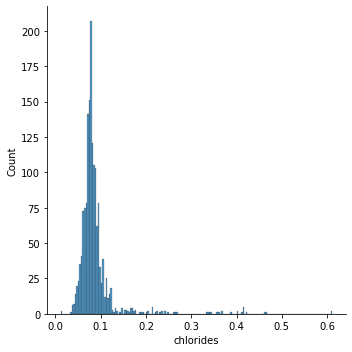

In [67]:
# densaty plot of chlorides
sns.displot(data=df, x='chlorides')

In [5]:
# check number of observation within x standards deviation
df.loc[(df.chlorides <= df.chlorides.mean() + 1 * df.chlorides.std()) & 
      (df.chlorides >= df.chlorides.mean() - 1 * df.chlorides.std()) ].chlorides.count() / df.chlorides.count()

0.9480925578486554

In [6]:
# check number of observation within 3 standards deviation for alcohol

df.loc[(df.alcohol <= df.alcohol.mean() + 3 * df.alcohol.std()) & 
      (df.alcohol >= df.alcohol.mean() - 3 * df.alcohol.std()) ].alcohol.count() / df.alcohol.count()

0.9949968730456535

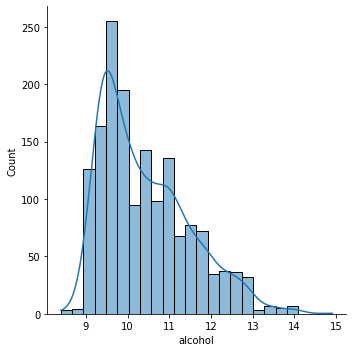

In [7]:
sns.displot(data=df, x='alcohol', kde=True)

In [8]:
df.alcohol.mean()

10.422983114446502

In [9]:
df.alcohol.median()

10.2

In [10]:
df.alcohol.mode()

0    9.5
Name: alcohol, dtype: float64

In [11]:
alpha = 0.05

In [12]:
# Shapiro-Wilks test for normality 
stat, pvalue = stats.shapiro(df.chlorides)

In [13]:
if pvalue > alpha:
    print('Fail to reject null hypothesis. Normally distribuited')
else:
    print('Reject null hypothesis. Not normally distribuited')

Reject null hypothesis. Not normally distribuited


In [14]:
# Shapiro-Wilks test for Sulphate
alpha = 0.05
stat, pvalue = stats.shapiro(df.sulphates)
print(pvalue)
if pvalue > alpha:
    print('Fail to reject null hypothesis. Normally distribuited')
else:
    print('Reject null hypothesis. Not normally distribuited')

5.821617678881608e-38
Reject null hypothesis. Not normally distribuited


# Standar error of the seample mean

In [15]:
# using a function
stats.sem(df.alcohol)

0.026650018979018173

In [16]:
# using standar deviation deveded by square root on sample number
df.alcohol.std()/np.sqrt(df.alcohol.count())

0.026650018979018118

In [17]:
# using a function
stats.sem(df.pH)

0.0038608683325203784

In [18]:
# using standar deviation deveded by square root on sample number
df.pH.std()/np.sqrt(df.pH.count())

0.0038608683325203753

# Confidence Interval

In [22]:
# confidence interval of the mean 
print(df['citric acid'].mean())
stats.norm.interval(alpha=0.95, loc=df['citric acid'].mean(), scale= stats.sem(df['citric acid']))

0.2709756097560964


(0.2614275451830109, 0.2805236743291819)

<AxesSubplot:xlabel='citric acid', ylabel='Count'>

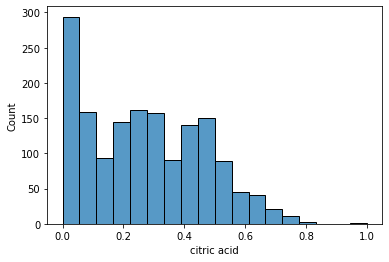

In [23]:
sns.histplot(data=df, x='citric acid')

In [25]:
# confidence interval of Density mean 
print(df.density.mean())

stats.norm.interval(alpha=0.95, loc=df.density.mean(), scale=stats.sem(df.density))

0.9967466791744831


(0.9966541725972511, 0.9968391857517152)

<AxesSubplot:xlabel='density', ylabel='Count'>

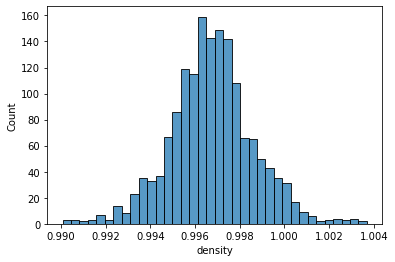

In [26]:
sns.histplot(data=df, x='density')

In [28]:
alpha = 0.05
stat, pvalue = stats.shapiro(df.density)

In [29]:
if pvalue > alpha:
    print('Fail to reject null hypothesis. Normally distribuited')
else:
    print('Reject null hypothesis. Not normally distribuited')

Reject null hypothesis. Not normally distribuited


In [30]:
pvalue

1.9400959061499634e-08

# T-test


In [71]:
df = pd.read_csv('stackoverflow.csv')

In [72]:
df.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
# subset 
UK = df.loc[df.Country == 'United Kingdom'].Salary
Germany = df.loc[df.Country == 'Germany'].Salary

In [74]:
alpha = 0.05

In [75]:
UK.std()**2 / Germany.std()**2

1.174941819162993

In [82]:
stat, pvalue = stats.ttest_ind(UK, Germany, equal_var=True, alternative="two-sided")

In [86]:
if pvalue > alpha:
    print('Fail to reject null hypothesis. Mean salary are similar')
else:
    print('Reject null hypothesis. Mean salary are not similar')

Reject null hypothesis. Mean salary are not similar


In [87]:
UK.mean()

54657.60356409483

In [88]:
Germany.mean()

52255.00916170152

In [89]:
pvalue

0.026389999555203502

In [92]:
# T-test 
df.columns

Index(['Country', 'Salary', 'YearsCodedJob', 'OpenSource', 'Hobby',
       'CompanySizeNumber', 'Remote', 'CareerSatisfaction', 'Data_scientist',
       'Database_administrator', 'Desktop_applications_developer',
       'Developer_with_stats_math_background', 'DevOps', 'Embedded_developer',
       'Graphic_designer', 'Graphics_programming',
       'Machine_learning_specialist', 'Mobile_developer',
       'Quality_assurance_engineer', 'Systems_administrator', 'Web_developer'],
      dtype='object')

In [93]:
India = df.loc[df.Country == 'India'].YearsCodedJob

In [94]:
USA = df.loc[df.Country == 'United States'].YearsCodedJob

In [96]:
India.mean()

3.6895910780669143

In [97]:
USA.mean()

8.270870655678968

In [99]:
USA.std()**2 / India.std()**2

3.5042969772229586

In [118]:
stat, pvalue = stats.ttest_ind(India, USA, equal_var=False, alternative='two-sided')

In [119]:
if pvalue > alpha:
    print('Fail to reject null hypothesis. Years of experince are similar')
else:
    print('Reject null hypothesis.  Years of experience are not similar')

Reject null hypothesis.  Years of experience are not similar


<AxesSubplot:xlabel='YearsCodedJob', ylabel='Count'>

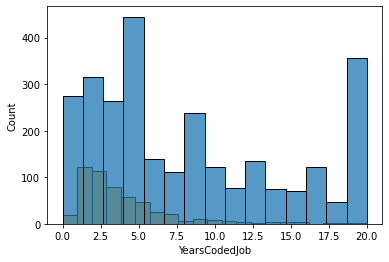

In [128]:
sns.histplot(India, color='orange' )
sns.histplot(USA)

# Chi-square test (Person)

In [134]:
# cross tabulation

tab = pd.crosstab(index=df.Country, columns = df.Remote)


tab


Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [136]:
chi2, pvalue, dof, expected = stats.chi2_contingency(tab)

In [139]:
if pvalue > alpha:
    print('Fail to reject null hypothesis. There is no relationsheap between Caountry and Remote')
else:
    print('Reject null hypothesis. There is a relationsheap between Country and Remote')

Reject null hypothesis. There is a relationsheap between Country and Remote


In [146]:
# chi square between company size and hobbies
tab = pd.crosstab(index=df.Hobby, columns=df.CompanySizeNumber)
tab

CompanySizeNumber,1,10,20,100,500,1000,5000,10000
Hobby,,,,,,,,
0,101,123,293,245,91,180,60,243
1,311,400,961,918,309,436,192,731


In [147]:
chi2, pvalue, dof, expected = stats.chi2_contingency(tab)

In [148]:
if pvalue > alpha:
    print('Fail to reject null hypothesis. There is no relationsheap between Company Size and Hobby')
else:
    print('Reject null hypothesis. There is a relationsheap between Company Size and Hobby')

Reject null hypothesis. There is a relationsheap between Company Size and Hobby
